# Moteur asynchrone

## Construction

Le moteur asynchrone triphasé est constitué d'un stator triphasé et d'un rotor.

### Stator

Le stator peut être représenté de la manière suivante:

<img src="Images/MAS/stator_triphase.png" alt="Stator de machine triphasée" width="300">

Il possède au moins 3 bobines identiques, positionnées de telle sorte à créer un décalage spatial de $\frac{2\pi}{3}$ entre-elles.

### Rotor

Le rotor existe sous 2 formes:

- rotor bobiné
- rotor à cage

On ne va s'intéresser qu'au rotor à cage, car c'est celui qui est étudié au laboratoire.

<img src="Images/MAS/rotor_cage.png" alt="Rotor à cage d'écureuil" width="300">

Il est constitué principalement de barres conductrices, reliées entre-elles aux extrémités.

## Fonctionnement

Afin de démarrer le moteur asynchrone, il suffit d'appliquer une tension triphasée équilibrée au stator de la machine.

### Champ magnétique tournant

Chaque bobine génère, lors de l'application de la tension triphasée, un champ magnétique dans son axe. La figure suivante présente les axes suivant lesquels le flux sera créé:

$$ E = -N \frac{d\Phi}{dt} $$

<img src="Images/MAS/champ_tournant.png" alt="Champ magnétique généré par une source triphasée équilibrée" width="400">

L'animation suivante montre la création du champ magnétique tournant.

In [3]:
%matplotlib inline
# notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

from matplotlib.animation import FuncAnimation

In [4]:
omega_t = np.linspace(0, 2 * np.pi, 101)

u_1 = np.sin(omega_t)
u_2 = np.sin(omega_t - 2 * np.pi / 3)
u_3 = np.sin(omega_t + 2 * np.pi / 3)

phi_1 = np.cos(omega_t)
phi_2 = np.cos(omega_t - 2 * np.pi / 3)
phi_3 = np.cos(omega_t + 2 * np.pi / 3)

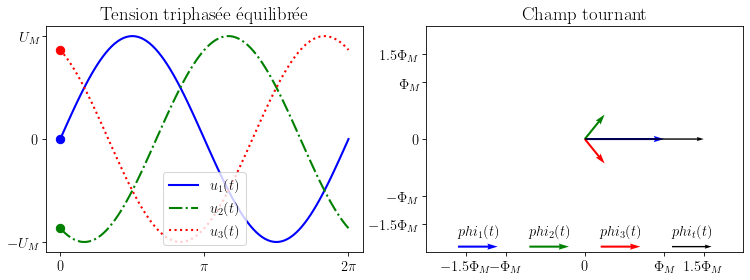

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(omega_t, u_1, 'b-', label=r'$u_1(t)$')
ax1.plot(omega_t, u_2, 'g-.', label=r'$u_2(t)$')
ax1.plot(omega_t, u_3, 'r:', label=r'$u_3(t)$')

u1, = ax1.plot(omega_t[0], u_1[0], 'bo')
u2, = ax1.plot(omega_t[0], u_2[0], 'go')
u3, = ax1.plot(omega_t[0], u_3[0], 'ro')

phi1 = ax2.quiver(0, 0, phi_1[0], 0, color='b', scale=1, scale_units='xy', units='xy', angles='xy', width=0.03)
phi2 = ax2.quiver(0, 0, phi_2[0]*np.cos(-2*np.pi/3), phi_2[0]*np.sin(-2*np.pi/3), color='g', scale=1, scale_units='xy', units='xy', angles='xy', width=0.03)
phi3 = ax2.quiver(0, 0, phi_3[0]*np.cos(2*np.pi/3), phi_3[0]*np.sin(2*np.pi/3), color='r', scale=1, scale_units='xy', units='xy', angles='xy', width=0.03)

phit_x = phi_1[0] + phi_2[0]*np.cos(-2*np.pi/3) + phi_3[0]*np.cos(2*np.pi/3)
phit_y = phi_2[0]*np.sin(-2*np.pi/3) + phi_3[0]*np.sin(2*np.pi/3)
phit = ax2.quiver(0, 0, phit_x, phit_y, color='k', scale=1, scale_units='xy', units='xy', angles='xy', width=0.02)

plt.quiverkey(phi1, -1.35, -1.9, 0.5, r'$phi_1(t)$', coordinates='data')
plt.quiverkey(phi2, -0.45, -1.9, 0.5, r'$phi_2(t)$', coordinates='data')
plt.quiverkey(phi3, 0.45, -1.9, 0.5, r'$phi_3(t)$', coordinates='data')
plt.quiverkey(phit, 1.35, -1.9, 0.5, r'$phi_t(t)$', coordinates='data')

def init():
    ax1.set_xticks([0, np.pi, 2 * np.pi])
    ax1.set_xticklabels([0, r'$\pi$', r'$2\pi$'])
    ax1.set_yticks([-1, 0, 1])
    ax1.set_yticklabels([r'$-U_M$', 0, r'$U_M$'])
    ax1.legend(loc=8)
    ax1.set_title('Tension triphasée équilibrée')
    
    ax2.set_xlim([-2, 2])
    ax2.set_xticks([-1.5, -1, 0, 1, 1.5])
    ax2.set_xticklabels([r'$-1.5\Phi_M$', r'$-\Phi_M$', 0, r'$\Phi_M$', r'$1.5\Phi_M$'])
    ax2.set_ylim([-2, 2])
    ax2.set_yticks([-1.5, -1, 0, 1, 1.5])
    ax2.set_yticklabels([r'$-1.5\Phi_M$', r'$-\Phi_M$', 0, r'$\Phi_M$', r'$1.5\Phi_M$'])
    ax2.set_title('Champ tournant')
    
    return u1, u2, u3, phi1, phi2, phi3, phit

def animate(i):
    u1.set_data(omega_t[i], u_1[i])
    u2.set_data(omega_t[i], u_2[i])
    u3.set_data(omega_t[i], u_3[i])
    
    phi1.set_UVC(phi_1[i], 0)
    phi2.set_UVC(phi_2[i]*np.cos(-2*np.pi/3), phi_2[i]*np.sin(-2*np.pi/3))
    phi3.set_UVC(phi_3[i]*np.cos(2*np.pi/3), phi_3[i]*np.sin(2*np.pi/3))
    
    phit_x = phi_1[i] + phi_2[i]*np.cos(-2*np.pi/3) + phi_3[i]*np.cos(2*np.pi/3)
    phit_y = phi_2[i]*np.sin(-2*np.pi/3) + phi_3[i]*np.sin(2*np.pi/3)
    
    phit.set_UVC(phit_x, phit_y)
       
anim = FuncAnimation(fig, animate, np.arange(len(omega_t)), init_func=init, interval=50, blit=True)

On remarque donc la création d'un champ résultant d'amplitude constante tournant à la pulsation des grandeurs électriques. 

Pour une machine à 1 paire de pôles, le champ tourne donc à $50\, \mathrm{Hz}$, soit à $3000\, \mathrm{tr/min}$. Cette vitesse est appelée vitesse de synchronisme, notée $N_s$ ou encore $\omega_s$.

La vitesse de synchronisme est divisée par le nombre de paires de pôles $p$. La vitesse de synchronisme est donc donnée par la formule suivante:

$$ N_s = \frac{60*f}{p} $$

Voici donc un tableau des vitesses de synchronisme en Europe:

| $N_s$ | $p$ |
| :-: | :-: |
| $3000$ | $1$ |
| $1500$ | $2$ |
| $1000$ | $3$ |
| $750$ | $4$ |
| $600$ | $5$ |

### Démarrage du moteur

Une fois la tension triphasée appliquée sur le stator, le champ tournant est créé. Le rotor voit alors un champ qui se déplace; il perçoit donc une variation de flux.

Les conducteurs du rotor voient donc apparaître à leurs bornes une tension (force électromotrice). Cependant, comme les conducteurs sont reliés entre-eux, le circuit électrique est donc fermé et un courant circule maintenant dans le rotor.

Le rotor est donc maintenant plongé dans le champ magnétique du stator, et parcouru par un courant. Il est donc soumis à la force de Laplace, tendant à s'opposer à ce qui lui a donné naissance. Le rotor se met donc à tourner dans le **même sens** que le champ tournant.

En effet, la variation de flux perçue par le rotor (ayant une pulsation $\omega_s$ au démarrage) étant à l'origine de l'induction magnétique au rotor, ce dernier tente de faire disparaître cette variation de flux. En tournant dans le même sens, la variation de flux diminue, et donc la tension induite et la force de Laplace aussi.

Cependant, on peut remarquer que le rotor du moteur asynchrone ne peut pas tourner à la vitesse $N_s$, car s'il le faisait, la variation de flux serait nulle et donc, la tension induite disparaîtrait, ainsi que la force de Laplace. Sans force, le moteur ne peut pas maintenir sa vitesse. Il est donc **impossible** pour le moteur asynchrone de tourner à la vitesse de synchronisme. D'où son appelation...

Le moteur va donc stabiliser sa vitesse un peu en-dessous de la vitesse de synchronisme.

### Définitions

On définit les grandeurs suivantes:

- $\omega_s$, la vitesse de synchronisme
- $\omega_r$, la vitesse de rotation du rotor
- $\omega_g=\omega_s-\omega_r$, la vitesse de glissement
- $g=\frac{\omega_s-\omega_r}{\omega_s}$, le glissement; $g\, \in\; ]0 \dots 1]$

### Schéma équivalent

Tout comme pour le transformateur, le moteur asynchrone est modélisé par un schéma électrique équivalent. Plus précisément, on parle de *schéma électrique équivalent d'une phase de l'étoile équivalente du moteur, vu du stator*.

Le schéma équivalent est semblable à celui du transformateur car, en comparant le fonctionnement de 2 machines, on se rend compte qu'ils sont semblables.

En effet, les 2 machines reçoivent une tension d'alimentation *d'un côté*, et voient une tension induite apparaître *de l'autre côté*.

Cependant, le moteur asynchrone possède 2 différences par rapport au transformateur:

- le côté où est induite la tension est court-circuitée
- la fréquence des grandeurs électriques au rotor est différente de celles du stator

Le second point est assez facile à prouver. Le stator est alimenté en $50\, \mathrm{Hz}$. La fréquence au stator est donc constante et connue.

Au rotor, par contre, la fréquence dépend de la vitesse. En effet, la tension induite au rotor est proportionnelle à la variation de flux perçue par la relation:

$$ E = -N \frac{d\Phi}{dt} $$

Comme les grandeurs sont sinusoïdales, la fréquence est conservée dans cette relation. En effet, la dérivée d'une sinusoïde de fréquence $f$ donne une cosinusoïde de même fréquence.

Cependant, au plus la vitesse augmente, au moins grande est cette variation de flux perçue par le rotor. La tension induite verra donc sa fréquence baisser.

Afin, de représenter le moteur par un schéma électrique, il faut s'assurer de ramener les grandeurs électriques du rotor, tant au niveau de l'amplitude qu'au niveau de la fréquence, à celles du stator.

Sans démonstration, le schéma électrique équivalent, après avoir pris en compte ces différentes difficultés, est donné à la figure suivante:

<img src="Images/MAS/schema_equivalent_mas.png" alt="Schéma équivalent de la machine asynchrone" width="600">

Dans ce schéma, on retrouve:

- $R_1$, la résistance des enroulements au stator
- $X_1$, la réactance de fuite du stator
- $R_{\mu}$, les pertes fer (hystérésis et courant de foucault)
- $X_{\mu}$, la réactance magnétisante
- $X_2'$, la réactance de fuite du rotor, ramenée au stator
- $R_2'$, la résistance du rotor, ramenée au stator

Il est à remarquer que le schéma possède un terme un peu spécial, dépendant de g: $R_2'/g$. Ce terme modélise la puissance transmise au rotor.

### Puissance mécanique et couple

La puissance au rotor contient 2 puissances, en négligeant les pertes mécaniques:

- les pertes Joules au rotor
- la puissance mécanique à l'arbre

Il est assez facile de décomposer ce terme en ces 2 puissances.

Les pertes Joules sont données par la formule:

$$ P_J = R_2' * I_2'^2 $$

La puissance totale au rotor est donnée par:

$$ P_R = \frac{R_2'}{g} * I_2'^2 $$

En soustrayant les pertes Joules de la puissance au rotor, il reste la puissance mécanique:

\begin{align}
  P_{mec} &= P_R - P_J \\
  &= \frac{R_2'}{g} * I_2'^2 - R_2' * I_2'^2 \\
  &= R_2' * I_2'^2 \left(\frac{1}{g} - 1\right) \\
  P_{mec} &= R_2' * I_2'^2 \left(\frac{1-g}{g}\right)
\end{align}

Le couple est alors obtenu ainsi:

\begin{align}
  C*\omega_r &= R_2' * I_2'^2 \left(\frac{1-g}{g}\right) \\
  C &= \frac{R_2' * I_2'^2}{\omega_r} \left(\frac{1-g}{g}\right) \\
  C &= \frac{R_2' * U_1^2}{\omega_r * Z_s} \left(\frac{1-g}{g}\right)
\end{align}

La dernière égalité est obtenue en utilisant le schéma équivalent simplifié, et en considérant $Z_s$ comme l'impédance totale du rotor.

Il est intéressant de remarquer que le couple dépend du carré de la tension.